# Experiment 9 - Random Forest
<b>Aadith Sukumar<br></b>

Assignment Questions:<br>

1. Use the attached stroke prediction data
2. Apply EDA for the dataset
3. Use a combination of datasets for training and testing as 60-40 and 70-30
4. Try three combinations of the number of estimators and the number of jobs
5. Evaluate the performance of the model in terms of accuracy, mean square error, root-mean-square error and mean absolute error
6. Show the plots for:
    1. variation in performance accuracy with different combinations of training and testing datasets
    2. variation in performance of mean square error, root-mean-square error, and mean absolute error with different combinations of training testing datasets
    3. variation in performance of mean square error, root-mean-square error, and mean absolute error with different combinations of a number of estimators and the number of jobs.

## Importing Libraries

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions
import pickle

## Importing Dataset

In [39]:
df = pd.read_csv('./data/stroke_prediction.csv')
df.head(100)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
95,Male,71.0,1,1,No,Govt_job,Rural,216.94,30.9,never smoked,1
96,Male,61.0,1,0,Yes,Self-employed,Rural,76.11,27.3,smokes,1
97,Male,74.0,0,0,Yes,Private,Urban,72.96,31.3,smokes,1
98,Female,38.0,0,0,No,Self-employed,Urban,82.28,24.0,formerly smoked,1


In [40]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [41]:
# encoding categorical data
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])
df.head(100)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
95,1,71.0,1,1,0,0,0,216.94,30.9,2,1
96,1,61.0,1,0,1,2,0,76.11,27.3,3,1
97,1,74.0,0,0,1,1,1,72.96,31.3,3,1
98,0,38.0,0,0,0,2,1,82.28,24.0,1,1


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int32  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int32  
 5   work_type          4981 non-null   int32  
 6   Residence_type     4981 non-null   int32  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   int32  
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 330.9 KB


## EDA

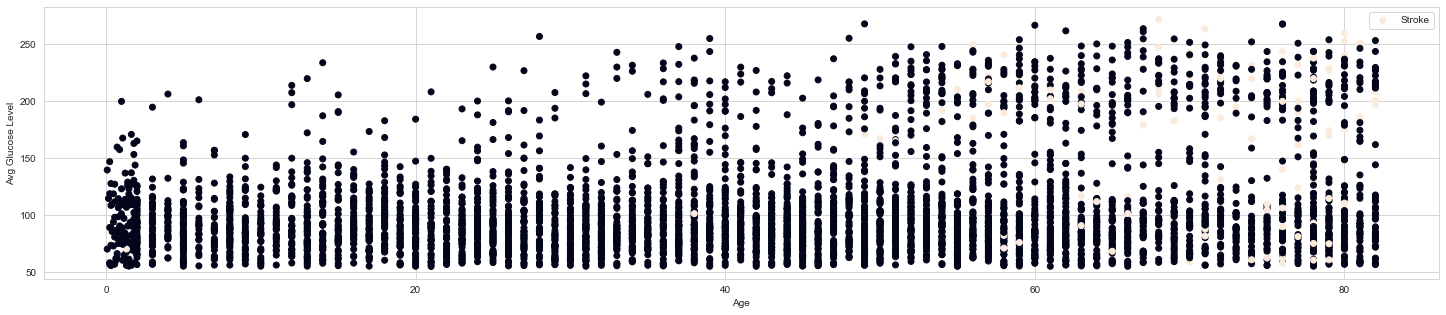

In [43]:
# plotting the data
plt.scatter(df['age'], df['avg_glucose_level'], c=df['stroke'])
plt.xlabel('Age')
plt.ylabel('Avg Glucose Level')
plt.legend(['Stroke', 'No Stroke'])
plt.show()

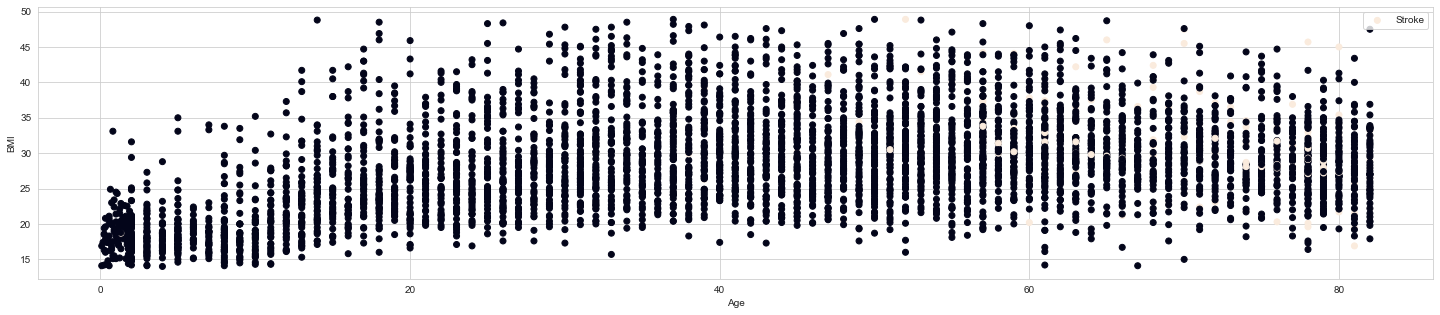

In [44]:
# plotting the data using bar chart
plt.scatter(df['age'], df['bmi'], c=df['stroke'])
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(['Stroke', 'No Stroke'])
plt.show()

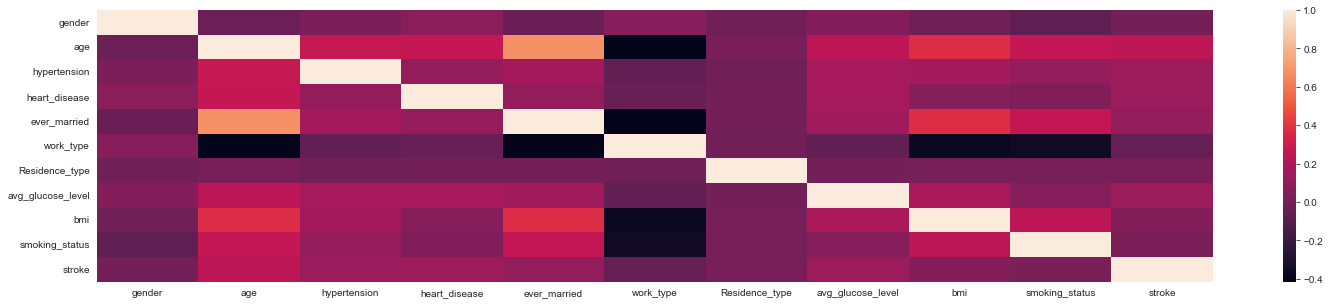

In [45]:
# plot heatmap
sns.heatmap(df.corr())
plt.show()

## Splitting Dataset and Applying Random Forest

In [46]:
# Splitting dataset into training and testing
X = df.drop('stroke', axis=1)
y = df['stroke']

### Trying various splitting ratios and estimators

#### Splitting Ratio: 60-40

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

acc6040=metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc6040)
mse6040=metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', mse6040)
rmse6040=metrics.mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error: ', rmse6040)
mae6040=metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: ', mae6040)

Accuracy:  0.9468138484696438
Mean Squared Error:  0.053186151530356246
Root Mean Squared Error:  0.23062122957428755
Mean Absolute Error:  0.053186151530356246


In [48]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Splitting Ratio: 70-30

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

acc7030=metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc7030)
mse7030=metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', mse7030)
rmse7030=metrics.mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error: ', rmse7030)
mae7030=metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: ', mae7030)

Accuracy:  0.945819397993311
Mean Squared Error:  0.05418060200668896
Root Mean Squared Error:  0.23276727005034226
Mean Absolute Error:  0.05418060200668896


In [50]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Changing the number of estimators and jobs to 1 and 2 respectively

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
forest = RandomForestClassifier(n_estimators=1, n_jobs=2, random_state=42)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

acce1j2=metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acce1j2)
msee1j2=metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', msee1j2)
rmsee1j2=metrics.mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error: ', rmsee1j2)
maee1j2=metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: ', maee1j2)

Accuracy:  0.8989966555183947
Mean Squared Error:  0.10100334448160535
Root Mean Squared Error:  0.31781023344380427
Mean Absolute Error:  0.10100334448160535


In [52]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
# save model to pkl
pickle.dump(forest, open('./models/randomforest_stroke.pkl', 'wb'))

#### Changing the number of estimators and jobs to 80 and 1000 respectively

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
forest = RandomForestClassifier(n_estimators=80, n_jobs=1000)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

acce80j1000=metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acce80j1000)
msee80j1000=metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', msee80j1000)
rmsee80j1000=metrics.mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error: ', rmsee80j1000)
maee80j1000=metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: ', maee80j1000)

Accuracy:  0.9444816053511705
Mean Squared Error:  0.05551839464882943
Root Mean Squared Error:  0.23562341702137637
Mean Absolute Error:  0.05551839464882943


In [55]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Changing the number of estimators and jobs to 200 and 200 respectively

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
forest = RandomForestClassifier(n_estimators=200, n_jobs=200)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

acce200j200=metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acce200j200)
msee200j200=metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', msee200j200)
rmsee200j200=metrics.mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error: ', rmsee200j200)
maee200j200=metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: ', maee200j200)

Accuracy:  0.9451505016722408
Mean Squared Error:  0.0548494983277592
Root Mean Squared Error:  0.23419969753985423
Mean Absolute Error:  0.0548494983277592


In [57]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Plotting the results

### Plotting variations in performance accuracy with different combinations of training and testing datasets

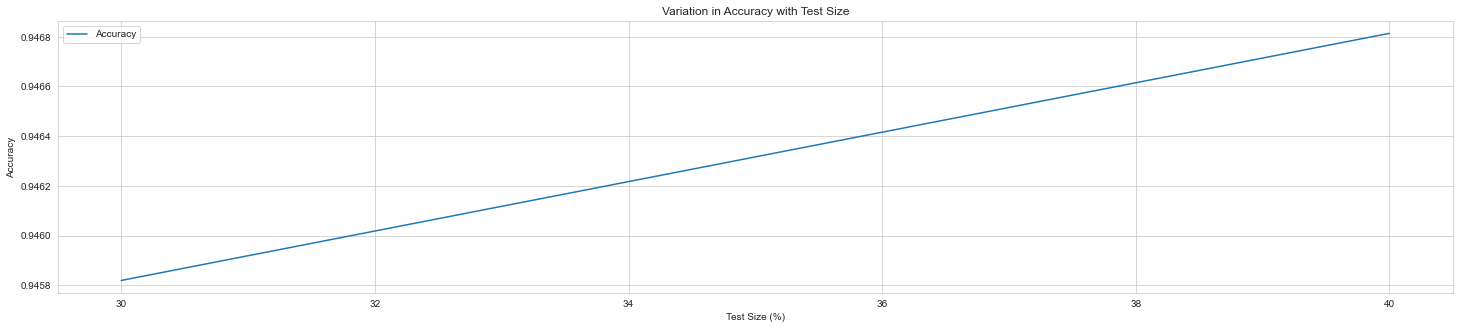

In [58]:
plt.plot([40, 30], [acc6040, acc7030], label='Accuracy')
plt.xlabel('Test Size (%)')
plt.ylabel('Accuracy')
plt.title('Variation in Accuracy with Test Size')
plt.legend()
plt.show()


### Plotting variations in metrics with different combinations of training and testing datasets

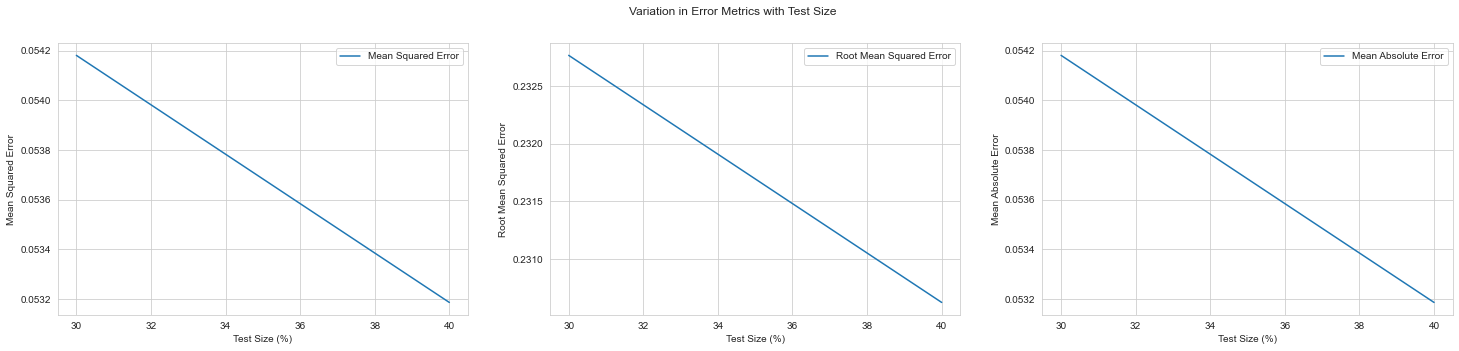

In [59]:
plt.rcParams['figure.figsize'] = [25, 5]
fig, axs = plt.subplots(1, 3)
fig.suptitle('Variation in Error Metrics with Test Size')
axs[0].plot([40, 30], [mse6040, mse7030], label='Mean Squared Error')
axs[0].set_xlabel('Test Size (%)')
axs[0].set_ylabel('Mean Squared Error')
axs[0].legend()
axs[1].plot([40, 30], [rmse6040, rmse7030], label='Root Mean Squared Error')
axs[1].set_xlabel('Test Size (%)')
axs[1].set_ylabel('Root Mean Squared Error')
axs[1].legend()
axs[2].plot([40, 30], [mae6040, mae7030], label='Mean Absolute Error')
axs[2].set_xlabel('Test Size (%)')
axs[2].set_ylabel('Mean Absolute Error')
axs[2].legend()
plt.show()


### Plotting variation in metrics with different combinations of a number of estimators.

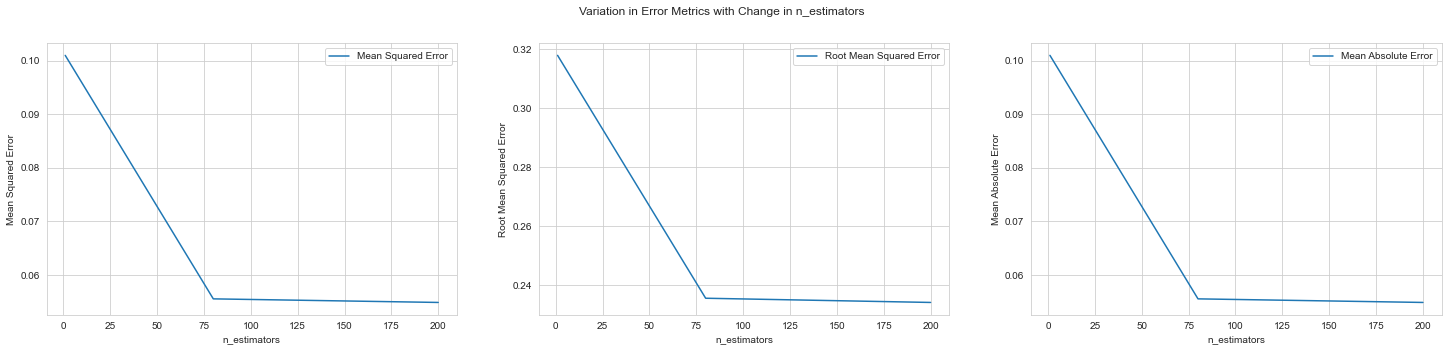

In [60]:
plt.rcParams['figure.figsize'] = [25, 5]
fig, axs = plt.subplots(1, 3)
fig.suptitle('Variation in Error Metrics with Change in n_estimators')
axs[0].plot([1, 80, 200], [msee1j2, msee80j1000, msee200j200], label='Mean Squared Error')
axs[0].set_xlabel('n_estimators')
axs[0].set_ylabel('Mean Squared Error')
axs[0].legend()
axs[1].plot([1, 80, 200], [rmsee1j2, rmsee80j1000, rmsee200j200], label='Root Mean Squared Error')
axs[1].set_xlabel('n_estimators')
axs[1].set_ylabel('Root Mean Squared Error')
axs[1].legend()
axs[2].plot([1, 80, 200], [maee1j2, maee80j1000, maee200j200], label='Mean Absolute Error')
axs[2].set_xlabel('n_estimators')
axs[2].set_ylabel('Mean Absolute Error')
axs[2].legend()
plt.show()

### Plotting variation in metrics with different combinations of a number of jobs

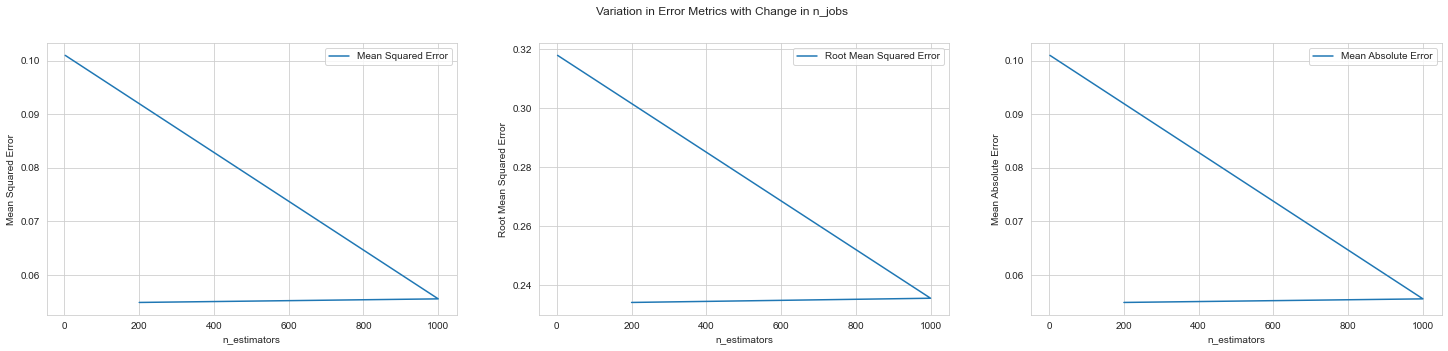

In [61]:
plt.rcParams['figure.figsize'] = [25, 5]
fig, axs = plt.subplots(1, 3)
fig.suptitle('Variation in Error Metrics with Change in n_jobs')
axs[0].plot([2, 1000, 200], [msee1j2, msee80j1000, msee200j200], label='Mean Squared Error')
axs[0].set_xlabel('n_estimators')
axs[0].set_ylabel('Mean Squared Error')
axs[0].legend()
axs[1].plot([2, 1000, 200], [rmsee1j2, rmsee80j1000, rmsee200j200], label='Root Mean Squared Error')
axs[1].set_xlabel('n_estimators')
axs[1].set_ylabel('Root Mean Squared Error')
axs[1].legend()
axs[2].plot([2, 1000, 200], [maee1j2, maee80j1000, maee200j200], label='Mean Absolute Error')
axs[2].set_xlabel('n_estimators')
axs[2].set_ylabel('Mean Absolute Error')
axs[2].legend()
plt.show()